In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/train_viz.csv")
student_data = pd.read_csv("../data/student_viz.csv")
professional_data = pd.read_csv("../data/professional_viz.csv")

In [3]:
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,CGPA,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,-1.0,2.0,8.0,Healthy,bachelors,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,-1.0,3.0,5.0,Unhealthy,bachelors,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,9.0,2.0,6.0,Healthy,bachelors,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,-1.0,1.0,5.0,Moderate,bachelors,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,-1.0,1.0,6.0,Unhealthy,bachelors,Yes,9.0,4.0,Yes,0


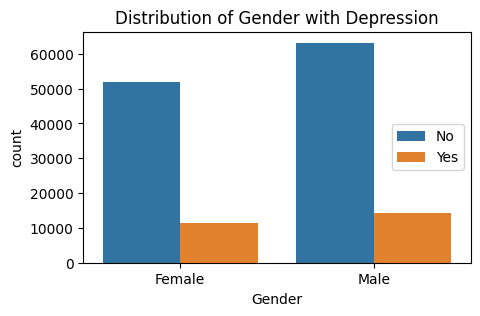

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data, x="Gender", hue="Depression")
plt.title("Distribution of Gender with Depression")
plt.legend(["No", "Yes"], loc="right")
plt.show()

In [6]:
depression_percent = data.groupby("Gender")["Depression"].mean() * 100
depression_percent.sort_values(ascending=False)

Gender
Male      18.455024
Female    17.823708
Name: Depression, dtype: float64

Based on our survey data, males and females have similar probabilities of experiencing depression. Therefore, we can rule out the possibility of one gender being significantly more prone to depression than the other.

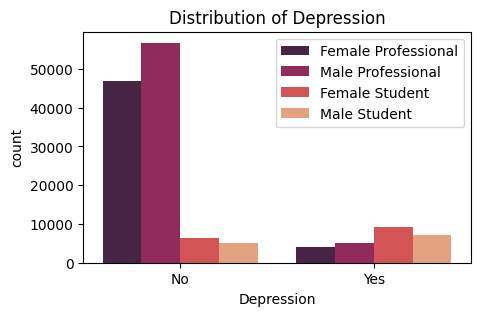

In [26]:
plt.figure(figsize=(5, 3))
sns.countplot(
    data,
    x="Depression",
    # hue=data[["Gender", "Working Professional or Student"]].apply(tuple, axis=1),
    hue=data["Gender"].astype(str)
    + ", "
    + data["Working Professional or Student"].astype(str),
    palette="rocket",
)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.title("Distribution of Depression")
plt.legend(
    ["Female Professional", "Male Professional", "Female Student", "Male Student"],
    loc="upper right",
)
plt.show()

In [20]:
depression_percent = (
    data.groupby(["Gender", "Working Professional or Student"])["Depression"].mean()
    * 100
)
depression_percent.sort_values(ascending=False)

Gender  Working Professional or Student
Male    Student                            58.628674
Female  Student                            58.450704
Male    Working Professional                8.367653
Female  Working Professional                7.959593
Name: Depression, dtype: float64

Both male and female students have a high likelihood of experiencing depression, whereas the percentage of depression among working professionals is significantly lower.

In [36]:
depression_percent = (
    data.groupby(["Gender", "Work/Study Hours"])["Depression"].mean()
    * 100
)
depression_percent.sort_values(ascending=False)

Gender  Work/Study Hours
Male    10.0                32.818917
Female  10.0                31.132382
        12.0                30.498822
Male    12.0                30.489156
Female  8.0                 25.142561
Male    8.0                 24.702853
        11.0                24.672027
Female  11.0                24.621278
Male    7.0                 20.791713
        6.0                 18.828526
Female  7.0                 18.338558
        6.0                 17.339469
        9.0                 16.692776
Male    9.0                 15.805340
        4.0                 14.010651
Female  4.0                 12.622520
        5.0                 12.243948
Male    5.0                 11.743702
        3.0                 11.320755
Female  3.0                 11.285483
Male    2.0                 10.710625
Female  2.0                  9.934613
        0.0                  8.745177
Male    1.0                  8.334873
        0.0                  7.730636
Female  1.0              

In [27]:
data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Work Pressure',
       'CGPA', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')